<a href="https://colab.research.google.com/github/Rijan-Joshi/Fun-Learning/blob/main/ConvNetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ConvNet From Scratch with augmentations**

This will contain:
1. image augmentation for increasing the volume of input  
2. visualization of intermediate features and images
3. Fine-tuning the known architecture for the sake of learning

All will be coded in PyTorch




In [114]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [105]:
#Loading the datasets
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(
    root = 'data',
    train = True,
    download = True,
    transform = transform
)

test_dataset = datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)

"Since we are using the concept of data augmentation, we will be using less samples of data. Currently, we have 5000 samples for cat and dogs each. But, we will use the dataset with 1000 training images, 500 validation imgages and 1000 test images"

In [106]:
from torch.utils.data import Subset
def create_balanced_subset(dataset, class_indices, start_index, end_index):

  targets = np.array(dataset.targets)
  selected_indices = []

  for cls in class_indices:
    indices = np.where(targets == cls)[0]
    selected_indices.extend(indices[start_index: end_index])

  dataset = Subset(dataset, selected_indices)
  return dataset

train_data = create_balanced_subset(train_dataset, [3,5], 0, 1000)
validation_data = create_balanced_subset(train_dataset, [3,5], 1000, 1500)
test_data = create_balanced_subset(test_dataset, [3,5], 0, 1000)

In [107]:
def check_subset_balance(subset, name="Subset"):
    # This pulls labels from the original dataset using the subset's internal indices
    labels = [subset.dataset.targets[i] for i in subset.indices]

    unique, counts = np.unique(labels, return_counts=True)
    print(f"--- {name} ---")
    print(f"Total samples: {len(subset)}")
    for cls, count in zip(unique, counts):
        print(f"Class {cls}: {count} samples")

check_subset_balance(train_data, "Training Set")
check_subset_balance(validation_data, "Validation Set")

--- Training Set ---
Total samples: 2000
Class 3: 1000 samples
Class 5: 1000 samples
--- Validation Set ---
Total samples: 1000
Class 3: 500 samples
Class 5: 500 samples


In [108]:
#Changing the class 3 -> 0 and 5 -> 1
class DatasetWrapper:
  def __init__(self, subset, mapping = {3 : 0, 5: 1}):
    self.subset = subset
    self.mapping = mapping

  def __getitem__(self, index):
    image, target = self.subset[index]
    return image, self.mapping[target]

  def __len__(self):
    return len(self.subset)

train_ready = DatasetWrapper(train_data)
validation_ready = DatasetWrapper(validation_data)
test_ready = DatasetWrapper(test_data)

In [115]:
#Creating dataloader
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_ready, batch_size, shuffle = True)
val_loader = DataLoader(validation_ready, batch_size, shuffle = True)
test_loader = DataLoader(test_ready, batch_size, shuffle = True)

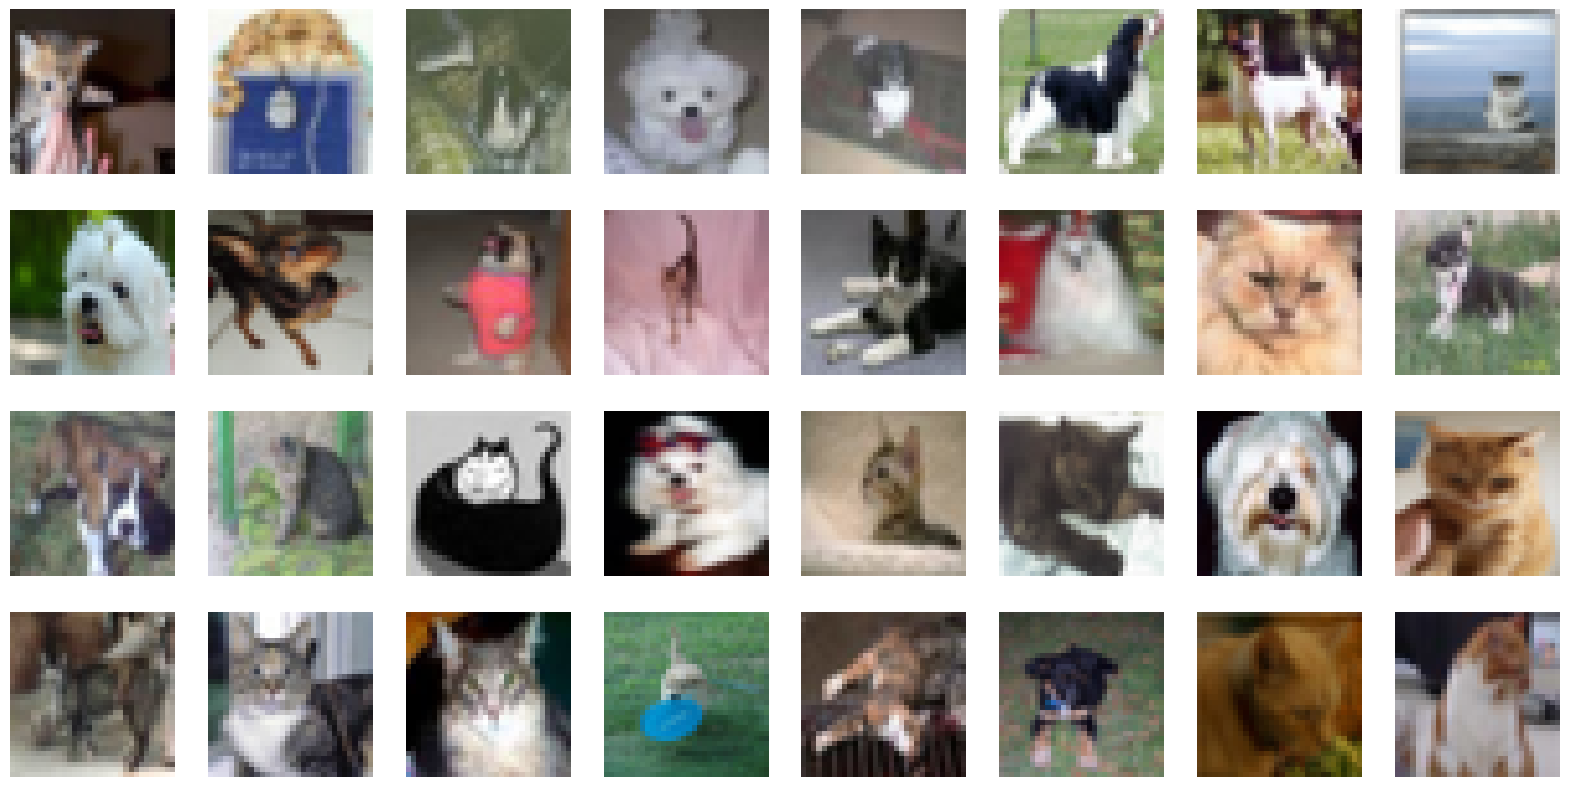

In [121]:
images, labels = next(iter(train_loader))

images = images.numpy()
images = np.transpose(images, (0, 2, 3, 1))
plt.figure(figsize = (20, 10))
for i in range(len(images)):
  plt.subplot(4, 8, i + 1)
  plt.imshow(images[i])
  plt.axis('off')
plt.show()
#Visualizing the first batch of the images